<div class="h1">Machine Learning Exam - Exercise 1</div> <a name="top"></a>
<div class="lead">PBA in Software Development, Business Academy Aarhus<br><small>Niels Wadsholt, May 2018</small></div>

## Table of contents <a name="table-of-content"></a>
1. [Overview](#Overview)
    -  [Provided code](#Provided-code)
2. [Part A](#Part-A)
    -  [A.1 Adjusting the number of hidden layers](#Part-A1)
    -  [A.2 Adjusting the number of units per layer](#Part-A2)
    -  [A.3 Adjusting the regularization term *alpha*](#Part-A3)
    -  [A.4 Combining the results](#Part-A4)
3. [Part B](#Part-B)
    -  [B.1 Logistic regression](#Part-B1)
    -  [B.2 K-means](#Part-B2)
    -  [B.3 Decision tree](#Part-B3)
    -  [B.4 Random forest](#Part-B4)
    -  [B.5 SVMs](#Part-B5)
4. [The finals](#finals)
5. [Conclusion](#Conclusion)
5. [References](#References)

## Overview<a name="Overview"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>
This exercise looks at scikit-learn's 2-dimensional *Moons* classification problem using the provided neural network code *moons_dataset_nn.py*.

The provided code
1. generates the data set using scikit-learn's <a href="http://scikit-learn.org/dev/modules/generated/sklearn.datasets.make_moons.html">make_moons</a> function
2. creates a scatter plot of the data using pandas' DataFrame data structure and matplotlib
3. randomly splits the data into training and test sets using scikit-learn's train_test_split with the default 75/25 split ratio
4. trains scikit-learn's <a href="http://scikit-learn.org/stable/modules/neural_networks_supervised.html#multi-layer-perceptron">Multi-layer Perceptron</a> classifier on the training set with two hidden layers consisting of 10 neurons each and the regularization term *alpha* not specified (defaults to 0.0001)
5. plots the result as a discrete scatter plot

### Provided code<a name="Provided-code"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>
(split up and adjusted for notebook view)

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 11 21:16:37 2018

@author: sila
"""

import matplotlib.pyplot as plt 
import matplotlib as mpl
import numpy as np
from pandas import DataFrame
from matplotlib.colors import ListedColormap, colorConverter
from sklearn.datasets import make_moons;

cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])
cm2 = ListedColormap(['#0000aa', '#ff2020'])

In [3]:
def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None, alpha=1,
                      cm=cm2, linewidth=None, threshold=None,
                      linestyle="solid"):
    # binary?
    if eps is None:
        eps = X.std() / 2.

    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0] if threshold is None else [threshold]
        fill_levels = [decision_values.min()] + levels + [
            decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5] if threshold is None else [threshold]
        fill_levels = [0] + levels + [1]
        
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, alpha=alpha, cmap=cm)
    else:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black", alpha=alpha, linewidths=linewidth,
                   linestyles=linestyle, zorder=5)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

In [4]:
def discrete_scatter(x1, x2, y=None, markers=None, s=10, ax=None,
                     labels=None, padding=.2, alpha=1, c=None, markeredgewidth=None):
    
    """Adaption of matplotlib.pyplot.scatter to plot classes or clusters.
    
    Parameters
    ----------
    x1 : nd-array
        input data, first axis
    x2 : nd-array
        input data, second axis
    y : nd-array
        input data, discrete labels
    cmap : colormap
        Colormap to use.
    markers : list of string
        List of markers to use, or None (which defaults to 'o').
    s : int or float
        Size of the marker
    padding : float
        Fraction of the dataset range to use for padding the axes.
    alpha : float
        Alpha value for all points.
    """
    
    if ax is None:
        ax = plt.gca()

    if y is None:
        y = np.zeros(len(x1))

    unique_y = np.unique(y)

    if markers is None:
        markers = ['o', '^', 'v', 'D', 's', '*', 'p', 'h', 'H', '8', '<', '>'] * 10

    if len(markers) == 1:
        markers = markers * len(unique_y)

    if labels is None:
        labels = unique_y

    # lines in the matplotlib sense, not actual lines
    lines = []

    current_cycler = mpl.rcParams['axes.prop_cycle']

    for i, (yy, cycle) in enumerate(zip(unique_y, current_cycler())):
        mask = y == yy
        # if c is none, use color cycle
        if c is None:
            color = cycle['color']
        elif len(c) > 1:
            color = c[i]
        else:
            color = c
        # use light edge for dark markers
        if np.mean(colorConverter.to_rgb(color)) < .4:
            markeredgecolor = "grey"
        else:
            markeredgecolor = "black"

        lines.append(ax.plot(x1[mask], x2[mask], markers[i], markersize=s,
                             label=labels[i], alpha=alpha, c=color,
                             markeredgewidth=markeredgewidth,
                             markeredgecolor=markeredgecolor)[0])

    if padding != 0:
        pad1 = x1.std() * padding
        pad2 = x2.std() * padding
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        ax.set_xlim(min(x1.min() - pad1, xlim[0]), max(x1.max() + pad1, xlim[1]))
        ax.set_ylim(min(x2.min() - pad2, ylim[0]), max(x2.max() + pad2, ylim[1]))

    return lines

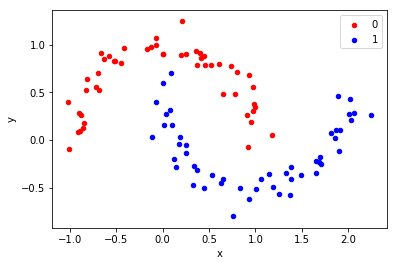

In [5]:
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.1)

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

plt.show()

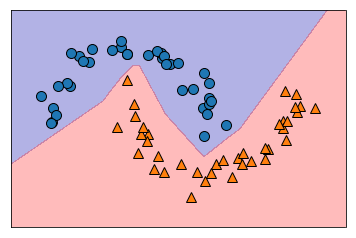

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)

plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.show()

Small addition to be able to meassure accuracy:

In [7]:
from sklearn.metrics import accuracy_score

y_pred = mlp.predict(X_test)
print ("Accuracy:", accuracy_score(y_test, y_pred) * 100)

Accuracy: 100.0


## Part A <a name="Part-A"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>
**- Adjusting the number of hidden layers, units per layer and the regularization term *alpha* **

The right number of layers and neurons per layer in a neural network is a much debated topic, and the general recommendations have changed in the last decade with the emergence of deep learning using backpropagation. In this case, the data set is relatively small and simple, so there is likely not much to be gained by increasing either significantly (see [Heaton](#Heaton)).

### A.1 Adjusting the number of hidden layers<a name="Part-A1"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>
To test this, let's begin by seeing how the model performs with three layers:

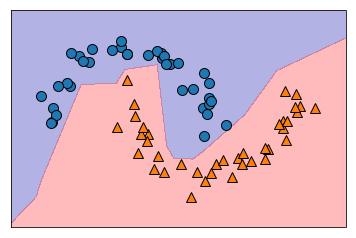

Accuracy: 100.0


In [8]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10, 10])
mlp.fit(X_train, y_train)

plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.show()

y_pred = mlp.predict(X_test)
print ("Accuracy:", accuracy_score(y_test, y_pred) * 100)

... with six:

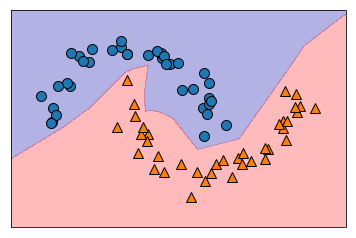

Accuracy: 100.0


In [9]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10, 10, 10, 10, 10])
mlp.fit(X_train, y_train)

plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.show()

y_pred = mlp.predict(X_test)
print ("Accuracy:", accuracy_score(y_test, y_pred) * 100)

... and with only one:

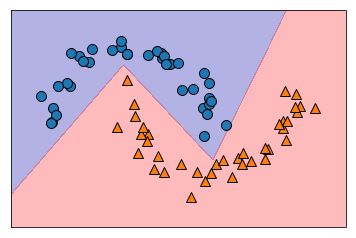

Accuracy: 96.0


In [10]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)

plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.show()

y_pred = mlp.predict(X_test)
print ("Accuracy:", accuracy_score(y_test, y_pred) * 100)

As expected, increasing the number of layers significantly does not appear to help - in fact it tends to make matters worse. Reducing the number of layers to only one, on the other hand, is not ideal either, even though the negativ effect during my testing often was negligible.

During my experimentation, **three layers** generally performed best.

### A.2 Adjusting the number of units per layer<a name="Part-A2"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>

So what about the number of neurons per layer? One rule of thumb says that it should be between the size of the input and output layers (see [Heaton](#Heaton)), so in this case 2.

Let's test this:

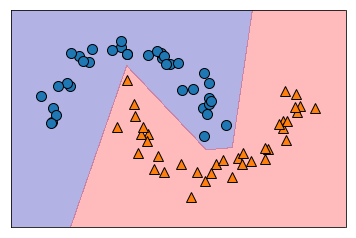

Accuracy: 96.0


In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[2, 2])
mlp.fit(X_train, y_train)

plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.show()

y_pred = mlp.predict(X_test)
print ("Accuracy:", accuracy_score(y_test, y_pred) * 100)

... and with five:

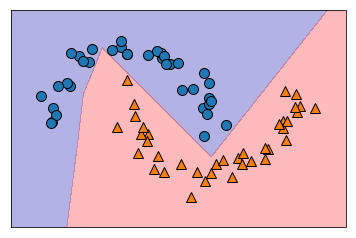

Accuracy: 96.0


In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[5, 5])
mlp.fit(X_train, y_train)

plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.show()

y_pred = mlp.predict(X_test)
print ("Accuracy:", accuracy_score(y_test, y_pred) * 100)

... and finally 20:

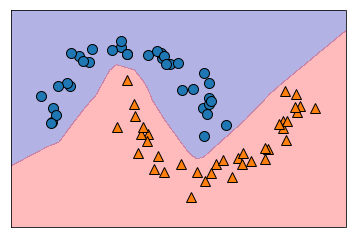

Accuracy: 100.0


In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[20, 20])
mlp.fit(X_train, y_train)

plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.show()

y_pred = mlp.predict(X_test)
print ("Accuracy:", accuracy_score(y_test, y_pred) * 100)

Well, no rule without exceptions, I guess ... In most cases, two neurons performed very poorly, while **twenty**  performed surprisingly well.

Combining the two findings, let's try three layers with 20 neurons each:

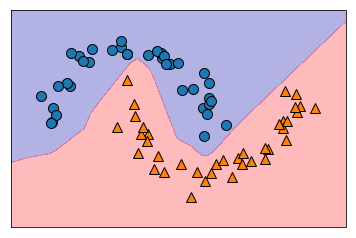

Accuracy: 100.0


In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[20, 20, 20])
mlp.fit(X_train, y_train)

plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.show()

y_pred = mlp.predict(X_test)
print ("Accuracy:", accuracy_score(y_test, y_pred) * 100)

While combining two positive results is not always guaranteed to yield something better, it appears to be the case here. The last model performed consistently well over several runs.

One important caveat, though: It was also significantly slower than the others.

### A.3 Adjusting the regularization term *alpha* <a name="Part-A3"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>
Varying the regularization parameter by factors of ten revealed that a high alpha value causes the classifier to *underfit* the data:

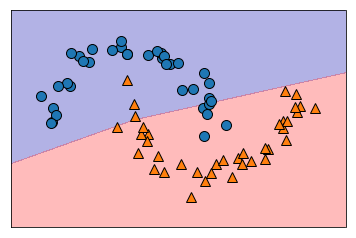

Accuracy: 84.0


In [15]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10], alpha=1)
mlp.fit(X_train, y_train)

plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.show()

y_pred = mlp.predict(X_test)
print ("Accuracy:", accuracy_score(y_test, y_pred) * 100)

... while a too low alpha value causes it to *overfit*:

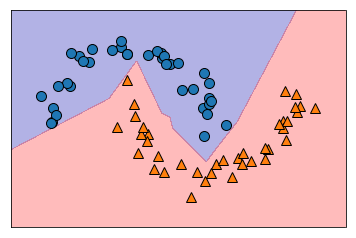

Accuracy: 96.0


In [16]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10], alpha=0.0000001)
mlp.fit(X_train, y_train)

plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.show()

y_pred = mlp.predict(X_test)
print ("Accuracy:", accuracy_score(y_test, y_pred) * 100)

This was as expected as the very purpose of regularization is to adjust the model's variance by adding a constraining factor to the weights.

I often found the default value of 0.0001 to be slightly overfitting the data (but as each generation of the moons data set is random, results vary).

In general, an alpha value of 0.001 performed quite well:

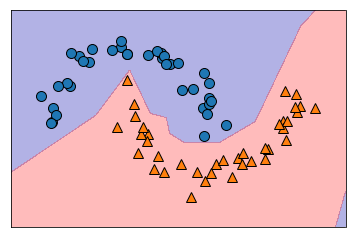

Accuracy: 96.0


In [17]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10], alpha=0.001)
mlp.fit(X_train, y_train)

plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.show()

y_pred = mlp.predict(X_test)
print ("Accuracy:", accuracy_score(y_test, y_pred) * 100)

### A.4 Combining the results <a name="Part-A4"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>
Finally, let's see how a combination of the three best results for number of layers, number of neurons per layer and regularization term performs:

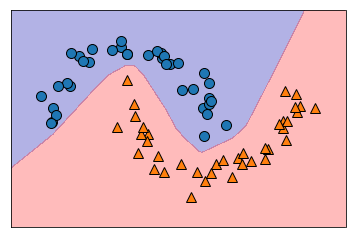

Accuracy: 100.0


In [18]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[20, 20, 20], alpha=0.001)
mlp.fit(X_train, y_train)

plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.show()

y_pred = mlp.predict(X_test)
print ("Accuracy:", accuracy_score(y_test, y_pred) * 100)

Wow! While the performance varied significantly between each data set generation for all three optimal settings, the combined model **hidden_layer_sizes=[20, 20, 20], alpha=0.001** performed surprisingly and consistently well.

**Conclusion:** It appears that when it comes to neural networks, the whole model is indeed greater than the sum of it's parts.

## Part B <a name="Part-B"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>
**- Comparison with other classification algorithms**

While deep neural networks have achieved amazing results in recent years, they are computationally expensive and can be hard to understand. For some classification problems, a lighter, more accessible model therefore might be a better choice.

Let's test this next:

### B.1 Logistic regression <a name="Part-B1"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>
Logistic regression is a linear classifier. Because the moons dataset is non-linear, logistic regression is a poor match:

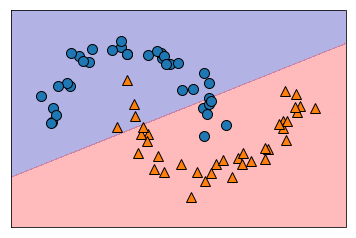

Accuracy: 84.0


In [19]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)

plot_2d_separator(logreg, X_train, fill=True, alpha=.3)
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.show()

y_pred = logreg.predict(X_test)
print ("Accuracy:", accuracy_score(y_test, y_pred) * 100)

### B.2 K-means <a name="Part-B2"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>
K-means is a clustering algorithm that iteratively assigns each point to the nearest of a predefined number of cluster centers, and then updates each cluster center's coordinates to be the mean of the point coordinates in that cluster. Because each point is attracted to the nearest center, the general shape of the clusters will be convex with no chance of modelling concave shapes like the two moons:

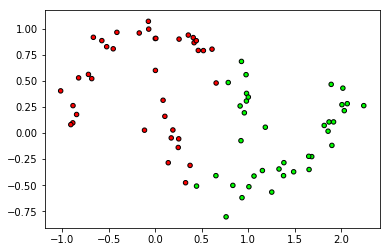

Accuracy: 76.0


In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=kmeans.labels_,
            edgecolor='black', cmap=ListedColormap(['#FF0000', '#00FF00']), s=20)

plt.show()

y_pred = kmeans.predict(X_test)
print ("Accuracy:", accuracy_score(y_test, y_pred) * 100)

### B.3 Decision tree <a name="Part-B3"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>
A decision tree is a classic example of a *divide and conquer* algorithm. It operates by drilling down through a series of questions and in turn divide the search space along each feature axis. This is why the plot it produces appears to be made up of rectangles.

Decision trees are fast and versatile and can be used for both regression and classification. They also work well for datasets with complex features.

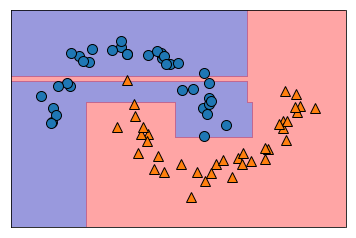

Accuracy: 88.0


In [22]:
from sklearn import tree

dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train, y_train)

plot_2d_separator(dtree, X_train, fill=True, alpha=.4)
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.show()

y_pred = dtree.predict(X_test)
print ("Accuracy:", accuracy_score(y_test, y_pred) * 100)

Let's also visualize the tree with graphviz:

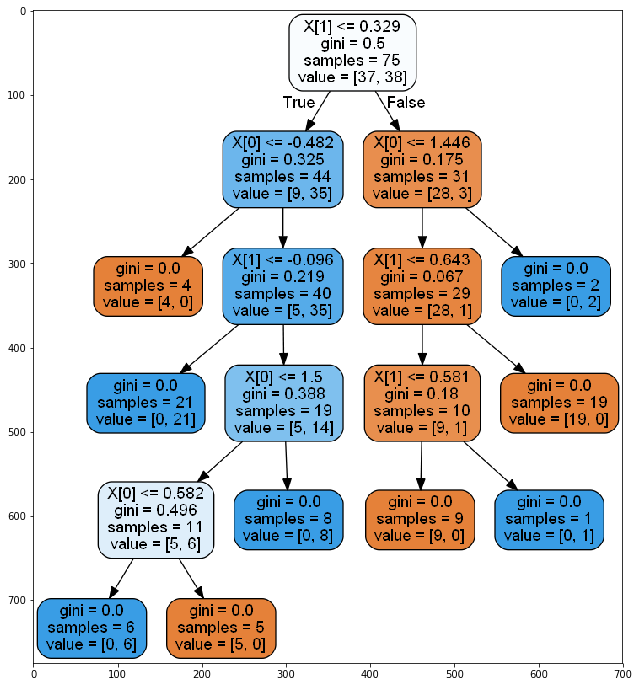

In [24]:
import pydotplus
import matplotlib.image as mpimg
import io

from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

dot_data = io.StringIO()

export_graphviz(dtree, out_file=dot_data, rounded=True, filled=True)

filename = "tree.png"
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png(filename)
img=mpimg.imread(filename)

plt.figure(figsize=(12,12))
imgplot = plt.imshow(img)

plt.show()

### B.4 Random forest <a name="Part-B4"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>
As the name suggests, a random forest is a group of decision trees with randomized feature selection. By training several trees and applying randomization, a random forest discourages overfitting. 

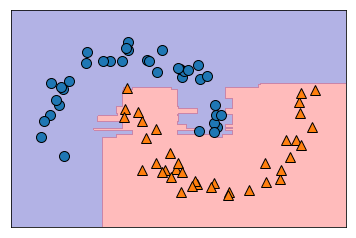

Accuracy: 96.0


In [21]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)

plot_2d_separator(rforest, X_train, fill=True, alpha=.3)
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.show()

y_pred = rforest.predict(X_test)
print ("Accuracy:", accuracy_score(y_test, y_pred) * 100)

### B.5 SVMs <a name="Part-B5"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>
A support vector machine is another very powerful and popular general-purpose algorithm that uses support vectors to find the best (widest) decision boundary between different classes.

An SVM with the default radial basis function kernel (rbf) and the penalty parameter C increased to 50 performed surprisingly well here:

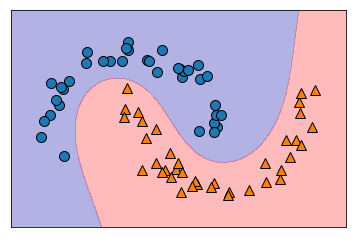

Accuracy: 100.0


In [22]:
from sklearn.svm import SVC

clf = SVC(C=50)
clf.fit(X_train, y_train)

plot_2d_separator(clf, X_train, fill=True, alpha=.3)
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.show()

y_pred = clf.predict(X_test)
print ("Accuracy:", accuracy_score(y_test, y_pred) * 100)

... while the polynomial kernel was a bit underwhelming, even with degree=3, until I found out that I had to increase the coef0 parameter from it's default value of 0. With this, it suddenly performed quite well too:

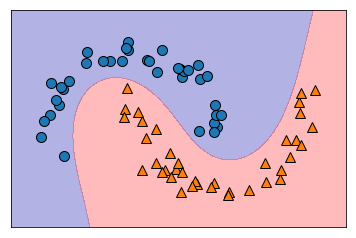

Accuracy: 100.0


In [23]:
clf = SVC(kernel='poly', degree=3, C=20, coef0=0.5)
clf.fit(X_train, y_train)

plot_2d_separator(clf, X_train, fill=True, alpha=.3)
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.show()

y_pred = clf.predict(X_test)
print ("Accuracy:", accuracy_score(y_test, y_pred) * 100)

... and finally the linear kernel as expected performed, well ... not well:

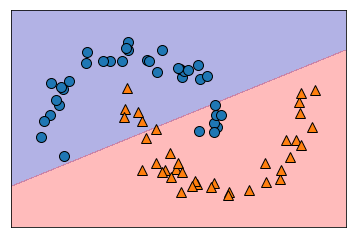

Accuracy: 88.0


In [24]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

plot_2d_separator(clf, X_train, fill=True, alpha=.3)
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.show()

y_pred = clf.predict(X_test)
print ("Accuracy:", accuracy_score(y_test, y_pred) * 100)

## The finals <a name="finals"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>
Based on the above experiments, two clear winner candidates have emerged:
> 1. A **multi-layer perceptron** with 3 hidden layers of 20 neurons each and alpha set to 0.001
> 2. A **support vector machine** with the default rbf kernel and the penalty parameter C set to 50

As a final test, let's see how fast they each perform by timing them through 100 runs.

First up, the multi-layer perceptron:

Wall time: 3.51 s


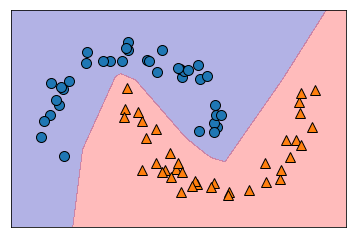

Accuracy: 100.0


In [25]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[20, 20, 20], alpha=0.001)
%time [mlp.fit(X_train, y_train) for i in range(100)]

plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.show()

y_pred = mlp.predict(X_test)
print ("Accuracy:", accuracy_score(y_test, y_pred) * 100)

Next, the support vector machine:

Wall time: 62.5 ms


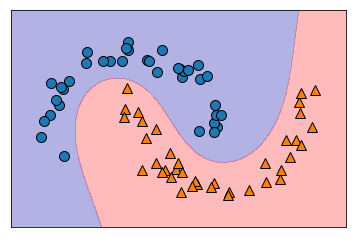

Accuracy: 100.0


In [26]:
clf = SVC(C=50)
%time [clf.fit(X_train, y_train) for i in range(100)]

plot_2d_separator(clf, X_train, fill=True, alpha=.3)
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.show()

y_pred = clf.predict(X_test)
print ("Accuracy:", accuracy_score(y_test, y_pred) * 100)

With a running time that is many times faster than it's competitor, the support vector machine is a clear winner here!

It should be noted, however, that this result does not meassure the general performance of SVMs vs. neural networks or other algorithms. I have only tested on the current data set which reveals nothing about how they each would perform on datasets of increasing size and complexity. In fact, scikit-learn specifically warns that the asymptotic running time of SVM as a function of the number of samples is more than quadratic (see <a href="http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a>). But then again, neural networks are famous for being computationally expensive, and depending of the number of layers and neurons, the SVM might still win.

## Conclusion <a name="Conclusion"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>
While the accuracy of the multi-layer perceptron reached a fairly high and stable level with the right settings, the consistent superior accuracy and speed of the support vector machine with the default Radial basis function kernel (rbf) and the penalty parameter C set to 50 takes the prize for this data set.

If the data had been more complex, however, the multi-layer perceptron would likely have been the better choice.

## References <a name="References"></a> <div class="pull-right"><a class="anchor-link" href="#top">&#8679;</a></div>

[Heaton] Heaton, Jeff - *The Number of Hidden Layers*. Heaton Research, 2017. https://www.heatonresearch.com/2017/06/01/hidden-layers.html<a name="Heaton"></a>